### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Photometric transformations**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

Image is defined as two dimensional function *f(x,y)* where x and y are spatial (plane) coordinates, and the amplitud of *f* at any pair of coordinates (*x*, *y*) is called the intensity of the image at that point.


#### Image processing has 3 types of computerized process:
* Low-level
    it involves in basic operations such as image preprocessing to **reduce noise**, **constrat ehancement** and image sharpening.

    <img src="./data/activity 1/low_level.png" alt="low level" width="500"/>
* Mid-level
    it involves tasks such as **segmentation**, **classification of individual objects**.

    <img src="./data/activity 1/mid_level.png" alt="mid level" width="600"/>
* High-level
    it involves "making sense" of an ensemble of recognized objects, as image analysis and performing the cognitive functions associated with human vision.

     <img src="./data/activity 1/high_level.png" alt="mid level" width="500"/>


#### Photometric Tranformations:

Photometric transformations are applied to change visual appearance of an image while preserving the its geometric structure. Some photometric transformations modify image's brightness, constrast, colour or tone. [2]

In this introductory notebook we are going to focus in Low-level processing with the following photometric transformations.

|   |   |   |   |  Image Substraction |  Gamma correction |  Negative Transformation |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Definition  |   |   |   | Subtracts pixel values from another image or a constant, making emphazis in differences  |  Adjusts the intensity of an image by applying a power law function | Inverts pixel intensities to create a negative effect  |
| Formula  |   |   |   | *I*<sup>'</sup> = *I*<sub>1</sub> - *I*<sub>2</sub> <br/> *I*<sup>'</sup> = *I* - *C* | *I*<sup>'</sup> = *c* ⋅ *I*<sup>γ</sup>  | *I* = *L* - 1 - *I*  |
|  Purpose |   |   |   | Highlight differences between two images | Corrects brightness and contrast non-linearly  | Creates an inverse image  |
| Visual Impact  |   |   |   | Highligths differences or removes background  |  Enhances details in dark or bright regions  |  Producces a negative effect, reversing light and dark regions  |
| Control parameters  |   |   |   |  second image or *C* | Scaling factor *C*, Gamma value γ  | Maximum intensity *L* (255 for 8-bit)  |





### Importing libraries

In [34]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [35]:
# Loading images
dog_img = Image.open('data/activity 1/perrito.jpeg')
dental_img = Image.open('data/activity 1/dental-x-ray.jpg')
microscope_img = Image.open('data/activity 1/microscope.jpg')
paysage_img = Image.open('data/activity 1/paysage.png')
retina_img = Image.open('data/activity 1/retina.png')
map_img = Image.open('data/activity 1/map2.jpg')
example_circuit_img = Image.open('data/activity 1/example_circuit.jpg')
defected_circuit_img = Image.open('data/activity 1/defected_circuit.jpg')
eiffel_img = Image.open('data/activity 1/eiffel.jpg')

### 1. Types of Photometric Tranformation

#### 1.1 Adjusting Brightness and Contrast

* **Brightness**: involves increasing or decreasing the intensity of the pixels. (**Beta** parameter adds brightness)
* **Contrast**: This modifies the difference between the brightness and the darkest parts of the image. (**Alpha** parameter scales contrast). [3]

The next code shows the implementation of the brightness and contrast adjustment.


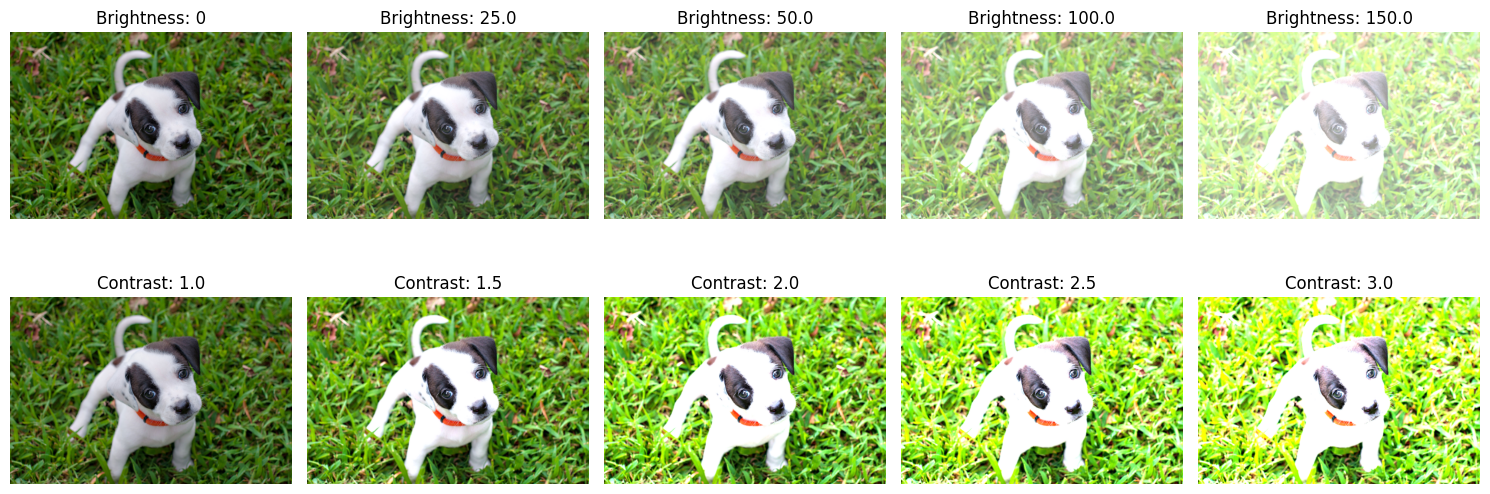

In [36]:
# anonimal function to test scales in alpha and beta
adjust_brightness_contrast = lambda img, a=1, b=0: cv2.convertScaleAbs(np.array(img), alpha=a, beta=b)
# scale of brightness and contrast
bright_scales = [0, 25.0, 50.0, 100.0, 150.0]
contrast_scales = [1.0, 1.5, 2.0, 2.5, 3.0]
# iterating the brightness dog imgs
brightness_dog_imgs = [adjust_brightness_contrast(img=dog_img, b=bright_scale) for bright_scale in bright_scales]
# iterating the contrast dog imgs
contrast_dog_imgs = [adjust_brightness_contrast(img=dog_img, a=contrast_scale) for contrast_scale in contrast_scales]

# ploting the results
fig, axs = plt.subplots(2, len(contrast_scales), figsize=(15,6))

for i, bright_img in enumerate(brightness_dog_imgs):
    axs[0, i].imshow(bright_img)
    axs[0, i].set_title(f"Brightness: {bright_scales[i]}")
    axs[0, i].axis("off")

for i, contrast_img in enumerate(contrast_dog_imgs):
    axs[1, i].imshow(contrast_img)
    axs[1, i].set_title(f"Contrast: {contrast_scales[i]}")
    axs[1, i].axis("off")

plt.tight_layout()
plt.show()

#### 1.2 *Thresholding*

This technique converts an image into a binary format (black and white) based on whether the pixel values are greater than or less than a defined threshold (T).  
  
The transformation formula for a pixel *I<sub>(x, y)</sub>* is as follows:
  
<img src="./data/activity 1/thresholding.png" alt="Thresholding transformation" width="250"/>    
  
This technique is used to segment objects of interest from the background in images, process documents for OCR applications, recognize patterns for ML models, isolate moving objects in video frames, and generate masks to define regions for further transformations, among other cases.

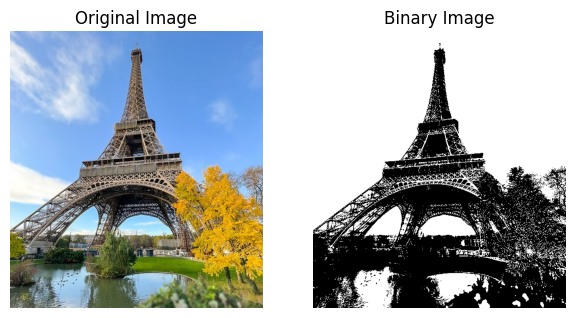

In [37]:
#Load the image in grayscale
eiffel_gray = cv2.cvtColor(np.array(eiffel_img), cv2.COLOR_BGR2GRAY)

#Apply thresholding with T = 144 and Max value = 255
eiffel_th = cv2.threshold(eiffel_gray, 144, 255, cv2.THRESH_BINARY)[1]

#Plot both images
plt.figure(figsize=(15,5))
plt.subplot(1,4,1), plt.imshow(eiffel_img, cmap='gray'), plt.title("Original Image"), plt.axis('off')
plt.subplot(1,4,2), plt.imshow(eiffel_th, cmap='gray'), plt.title("Binary Image"), plt.axis('off')
plt.show()

#### 1.3 Contrast Stretching

Contrast Stretching is a technique that improves the contrast of an image by stretching the range of intensity values to span a desired range (0-255 for 8-bit images)

**Transformation used for contrast stretching**

<img src="./data/activity 1/stretching_transformation.png" alt="Stretching transformation" width="250"/>
x

The locations of points (*r<sub>1</sub>*,*s<sub>1</sub>*) and (*r<sub>2</sub>*, *s<sub>2</sub>*) control the shape of the transformation function.

If *r<sub>1</sub>* = *s<sub>1</sub>* and *r<sub>2</sub>* = *s<sub>2</sub>* the transformation is linear that produces no changes in the intensity.

If *r<sub>1</sub>* = *r<sub>2</sub>*, *s<sub>1</sub>* = 0, and *s<sub>2</sub>* = *L* - 1 the transformation becomes a thresholding function. (creates a binary image) 

<img src="./data/activity 1/binary_img.png" alt="Binary image" width="100"/>

If (*r<sub>1</sub>*, *s<sub>1</sub>*) = (*r*<sub>min</sub>, 0) and (*r<sub>2</sub>*, *s<sub>2</sub>*) = (*r*<sub>max</sub>, *L* - 1) where *r*<sub>min</sub> and *r*<sub>max</sub> denote the minimum and maximum intensity levels in the input image.

<img src="./data/activity 1/contrast_stretching_formula.png" alt="contrast stretching formula" width="250"/>

where:

* *r*: Input pixel intensity.
* *r*<sub>min</sub> and *r*<sub>max</sub>: Minimum and maximum intensity values in the input image.
* *s*<sub>min</sub> and *s*<sub>max</sub>: Desired intensity range (e.g., 0-255).
* *s*: Output pixel intensity.


**when to use contrast stretching**:
* when our image has low contrast.
* Improving the constrast of X-rays images.

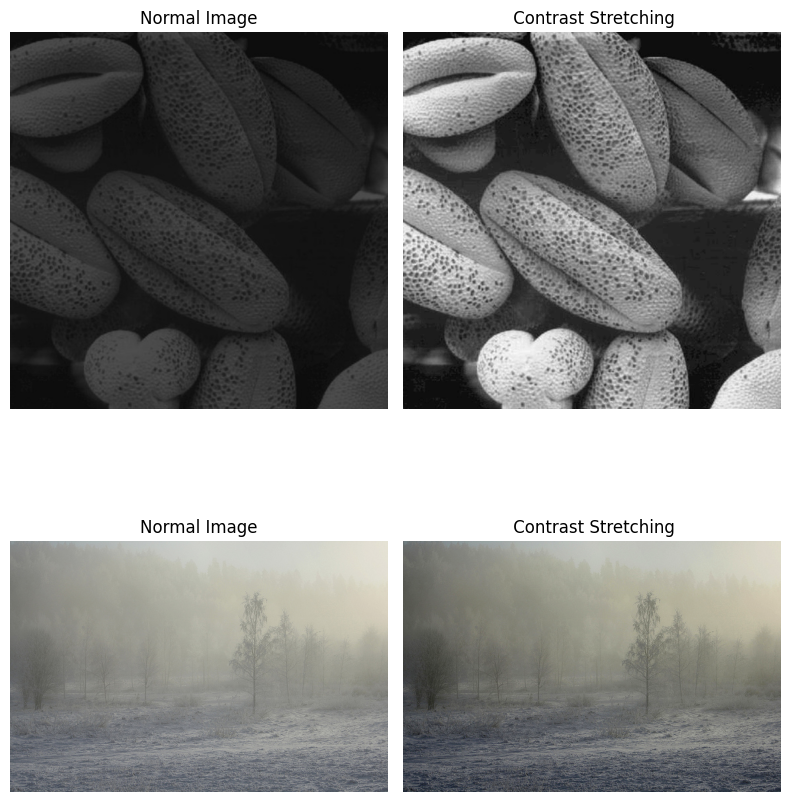

In [38]:
def r_intensity(img):
    """
    calculating r_min and r_max intensity values in the input image
    """
    # Calculate r_min and r_max
    r_min, r_max = np.min(img), np.max(img)
    return { 'min': r_min, 'max': r_max }

# apply contrast stretching
def contrast_stretching(img, r_min, r_max):
    """
    Contrast stretching mathematical operation
    """
    # Define desired INTENSITY s_min and s_max
    s_min, s_max = 0, 255
    # Output pixel intensity
    s = ((img - r_min) / (r_max - r_min) * (s_max - s_min) + s_min).astype(np.uint8)
    return s

# images as array
microscope_img_array = np.array(microscope_img)
paysage_img_array = np.array(paysage_img)

# getting intensity of images
r_microscope = r_intensity(microscope_img_array)
r_paysage = r_intensity(paysage_img_array)

# images to test contrast stretching
contrast_str_imgs = [
                     [microscope_img_array, contrast_stretching(microscope_img_array, r_microscope['min'], r_microscope['max'])],
                     [paysage_img_array, contrast_stretching(paysage_img_array, r_paysage['min'], r_paysage['max'])]]

labels = ["Normal Image", " Contrast Stretching"]

# grid to plot the images 2x2
fig, axs = plt.subplots(2, 2, figsize=(8,10))
# iterating every image in contrast stretching images array
for i, _imgs in enumerate(contrast_str_imgs):
    # iterating the original and contrasted image
    for j, _img in enumerate(_imgs):
        # plot the image.
        axs[i, j].imshow(_img)
        axs[i, j].set_title(labels[j])
        axs[i, j].axis("off")
plt.tight_layout()
plt.show()

### 2. Negative Images and Their Applications: A Case Study in Medical Imaging



An Image negative is a complete inversion of an image, where the lightest areas appear dark and the darkest areas appear light. The negative of an image is created by subtracting the pixel values from the maximum intensity value. For an 8-bit image, the maximum intensity value is 255, so the negative of an image can be calculated as:

*Negative Image = L - 1 - Image*

where L is the maximum intensity value (255 for an 8-bit image) and Image is the original image. The negative image can be used to enhance the visibility of certain features in an image by inverting the pixel intensities and highlighting the edges of objects [5].

In specific case study, we are going to apply negative images to enhance the visibility of certain features in X-ray images. One of the main advantages of using negative images in X-ray imaging is that it can help to improve the visibility of certain features that may be difficult to see in a standard X-ray image. By creating a negative image of an X-ray, it is possible to enhance the contrast of the image and highlight the edges of bones and other structures, making it easier to identify and analyze these features.

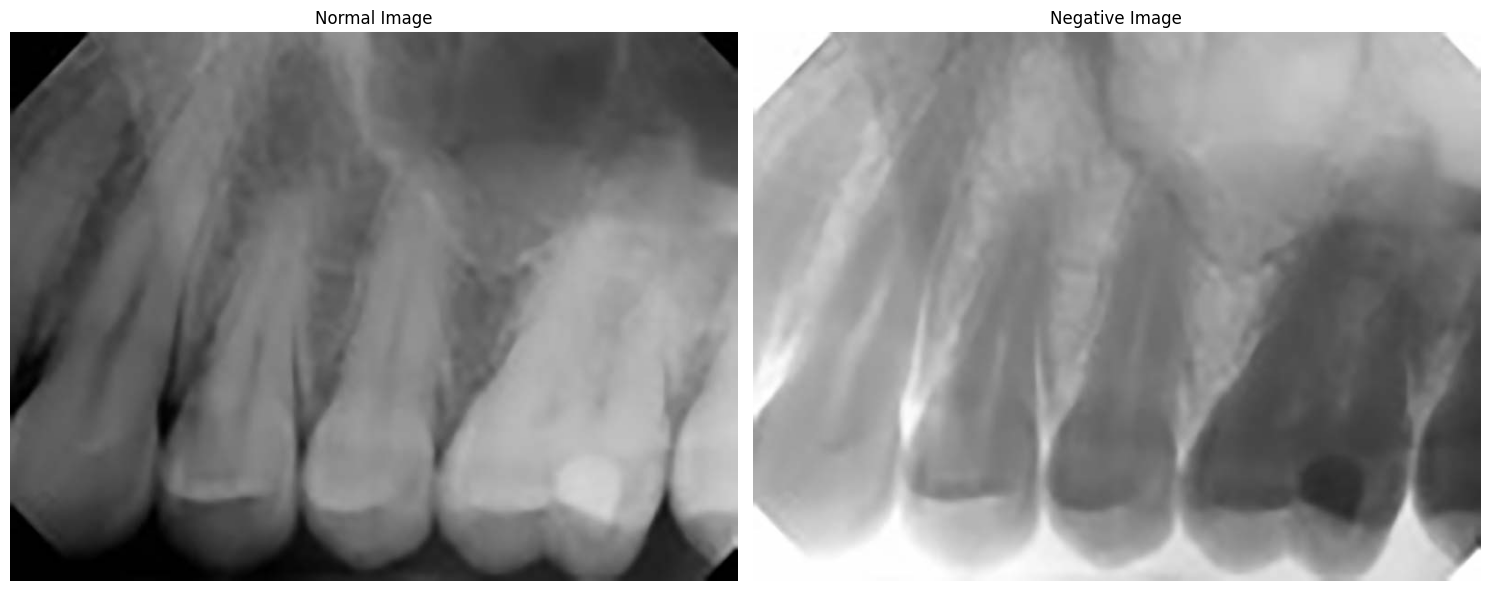

In [39]:
# get an image as array
dental_array_img = np.array(dental_img)
# apply the formula L - 1 - I
negative = 255 - dental_array_img
# save the image and transformed image (negative transformation)
dental_imgs = [dental_array_img, negative]
# labels to show in every plot
labels = ["Normal Image", "Negative Image"]

# plot the results in a grid of 1x2
fig, axs = plt.subplots(1, 2, figsize=(15,6))
# iterate the images (original, negative image)
for i, dental in enumerate(dental_imgs):
    # plot the image
    axs[i].imshow(dental)
    # set a title
    axs[i].set_title(labels[i])
    # hide axis
    axs[i].axis("off")
    
plt.tight_layout()
plt.show()

### 3. Gamma Correction and its Application: A Case Study in satellite imaging

Gamma correction is a technique used to adjust the brightness and contrast of an image by applying a non-linear transformation to the pixel values. The gamma correction function is defined as: a power-law function that raises the input pixel values to a certain power (gamma value).

The gamma correction function is given by the formula:

V<sub>out</sub> = V<sub>in</sub><sup>γ</sup>

where:
* V<sub>out</sub> is the output pixel value.
* V<sub>in</sub> is the input pixel value.
* γ is the gamma value.

The gamma correction function is used to adjust the brightness and contrast of an image by applying a non-linear transformation to the pixel values. By adjusting the gamma value, it is possible to enhance the contrast of the image and highlight the edges of features, making it easier to identify and analyze these features.

The importance of gamma correction has a positive impact on computer vision applications, some of the applications are according to Kumar, P., & Kumar, P. (2024):
* Reliable Imaging Uniformity
* Improved Contrast & Detail
* Color Accuracy
* Consistency of Display
* Adjustable to Lighting Conditions

In the specific case study, we are going to apply gamma correction to enhance the contrast and detail of an image representing an image satellite. By applying gamma correction to the image, it is possible to adjust the brightness and contrast of the image, making it easier to identify and analyze the features of the image.

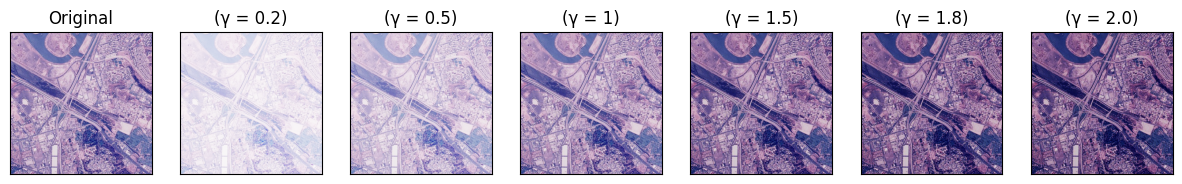

In [42]:
map_array_img = np.array(map_img)
# collection of original image and gamma transformation applied.
gamma_images = [map_array_img]
# gamma values to apply
gamma_values = [0.2, 0.5, 1, 1.5, 1.8, 2.0]

# apply gamma tranformation to original image
for gamma_value in gamma_values:
  gamma_transformation = np.array(255 * (map_array_img / 255) ** gamma_value, dtype=np.uint8)
  # append image tranformed
  gamma_images.append(gamma_transformation)

# get 2 rows
nrows = round(len(gamma_images) / 3)

# define the grid
fig, axs = plt.subplots(nrows, 4, figsize=(16,8))

# iterate the axs as flat array to iterate the gamma images array
for i, ax in enumerate(axs.flat):
  # if index is minor than len of array then
  if i < len(gamma_images):
    # plot the image
    ax.imshow(gamma_images[i])
    # set a title
    ax.set_title("Original" if i == 0 else f"(γ = {gamma_values[i - 1]})")
    # avoid axis
    ax.axis("off")
  else:
    # else dont show anything
    ax.axis("off")
  
plt.tight_layout()
plt.show()

As a result, gamma correction can help to improve the quality of the image and make it more suitable for use in computer vision applications. In this case we can see that we can obtain a better or worse image depending on the gamma value we use, if we use a gamma value of 1 we will obtain the same image as the original, if we use a gamma value greater than 1 we will obtain a darker image and if we use a gamma value less than 1 we will obtain a clearer image.

### 4. Image substraction and its Application: A Case Study in Quality Control

image subtraction is a technique used to enhance the visibility of differences between two images by subtracting the pixel values of one image from the pixel values of another image. The result of the subtraction is a new image that highlights the differences between the two images.

The advantage of using image subtraction is that it can help to identify and analyze changes in an image that may be difficult to see in the original images. By subtracting the pixel values of one image from another image, it is possible to enhance the contrast of the image and highlight the differences between the two images. [8]

Some applications of image subtraction are:
* Medical Imaging: Image subtraction is used in medical imaging to identify changes in X-ray images over time.
* Security: Image subtraction is used in security applications to detect changes in surveillance images.
* Forensics: Image subtraction is used in forensics to analyze differences between images.
* Quality Control: Image subtraction is used in quality control to identify errors in electronic circuits.

In this case of study we are going to use it to identify errors on quality control of electronic circuits. By applying image subtraction to the images of the electronic circuits, it is possible to identify and analyze the differences between the images and detect errors in the circuits. This can help to improve the quality control process and ensure that the circuits are functioning correctly.

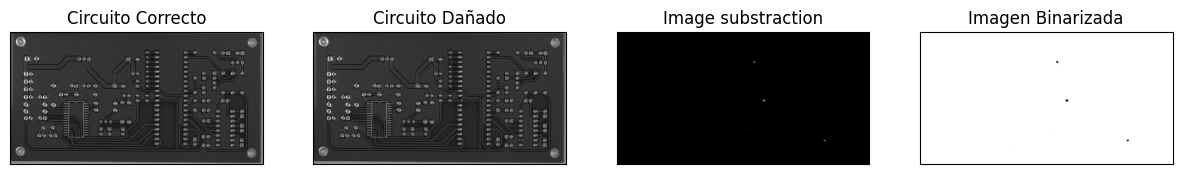

In [41]:
example_circuit_gray = cv2.cvtColor(np.array(example_circuit_img), cv2.COLOR_BGR2GRAY)
defected_circuit_gray = cv2.cvtColor(np.array(defected_circuit_img), cv2.COLOR_BGR2GRAY)

img2 = cv2.resize(defected_circuit_gray, (example_circuit_gray.shape[1], example_circuit_gray.shape[0]))

# Difference of images
diff = cv2.absdiff(example_circuit_gray, defected_circuit_gray)

# Binarizing
thresh = cv2.threshold(diff, 40, 255, cv2.THRESH_BINARY)[1]

inverted_diff = cv2.bitwise_not(thresh)

# array with the original image and subtraction image with the defected PCB localized.
subtraction_imgs = [
    {"image": example_circuit_gray, "label": "Good PCB"}, 
    {"image":defected_circuit_gray, "label": "Damaged PCB"}, 
    {"image":diff, "label": "Missing holes"}, 
    {"image": inverted_diff, "label": "Binarized Image"}
]

# define the grid 2x2
fig, axs = plt.subplots(2, 2, figsize=(16,8))

for i, ax in enumerate(axs.flat):
    # if index is minor than len of array then
    if i < len(subtraction_imgs):
        # get the image
        subtraction_img = subtraction_imgs[i]
        # plot the image
        ax.imshow(subtraction_img["image"], cmap="gray")
        # set a title
        ax.set_title(subtraction_img["label"])
        # avoid axis
        ax.axis("off")
    else:
        # else dont show anything
        ax.axis("off")
plt.tight_layout()
plt.show()


As saw image substraction can help to identify changes between two images, and in the case of quality control of electronic circuits, it can help to identify errors in the circuits and improve the quality control process.

### Conclusion

The exploration of image processing techniques highlights the critical role of proper preprocessing in computer vision applications, as it directly affects the quality and accuracy of subsequent models.

The implementation of methods such as contrast enhancement, noise reduction, and segmentation demonstrates how the combination of these techniques can optimize the visual interpretation of complex data.

Furthermore, it becomes evident that the appropriate selection of techniques depends on the specific context and objectives of the analysis, emphasizing the need for a critical and adaptive approach in their practical application.

### References

Alard, C. (2000). Image subtraction using a space-varying kernel. *Astronomy And Astrophysics Supplement Series, 144*(2), 363-370. https://doi.org/10.1051/aas:2000214

Chandrasekaran, K. (2022, January 5). Basic Operations on Images using OpenCV — Python - Koushik Chandrasekaran - Medium. *Medium*. https://medium.com/@koushikc2000/basic-operations-on-images-using-opencv-python-cb0d60d11911

Gonzalez, R., & Woods, R. (2018). *Digital Image Processing* (4th ed.). Pearson.

Illustration of transforms — Torchvision main documentation. (2017). *Torchvision*. https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html#:~:text=Photometric%20image%20transformation%20refers%20to,while%20preserving%20its%20geometric%20structure

Kumar, P., & Kumar, P. (2024, November 6). What is Gamma Correction and Its Importance in Embedded Vision? *E-con Systems*. https://www.e-consystems.com/blog/camera/technology/what-is-gamma-correction-and-why-is-it-so-crucial-for-embedded-vision-systems/

PCB defects. (2021, May 24). *Kaggle*. https://www.kaggle.com/datasets/akhatova/pcb-defects

Saleh, M. D., Eswaran, C., & Mueen, A. (2010). An automated blood vessel segmentation algorithm using histogram equalization and automatic threshold selection. *Journal of Digital Imaging, 24*(4), 564–572. https://doi.org/10.1007/s10278-010-9302-9

Satellite Image. (n.d.). *Kaggle*. https://www.kaggle.com/datasets/luffyluffyluffy/the-uscsipi-image-database

Singnoo, J., & Finlayson, G. D. (2010). Understanding the gamma adjustment of images. *Color and Imaging Conference, 18*(1), 134–139. https://doi.org/10.2352/cic.2010.18.1.art00024
